In [1]:
import librosa
from skimage import feature
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.feature import match_template

In [2]:
from scipy.signal import butter, sosfilt, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [3]:
(sig, rate) = librosa.load('VP4_mono.wav', sr=22050)

In [4]:
rate

22050

In [5]:
sig.shape

(144699686,)

In [8]:
#filename='C:/Users/dgnhk_000/Downloads/ARSU 2017/20170330_Uhu/Waldschnepfe_recog/VP4_mono.wav'
#librosa.output.write_wav(filename,sig,22050)

FFT parameters

In [4]:
# FFT and Filtering parameters
band_freq_min=2000
band_freq_max=10500
windowlength=512 # also equals to NFFT
N_overlap=400 # Overlap length in STFT 

Load the Keras CNN model

In [5]:
from tensorflow.keras.models import load_model
import h5py

filename='C:/Users/dgnhk_000/Downloads/ARSU 2017/20170330_Uhu/Waldschnepfe_recog/my_model_epochs6.h5'
model = load_model(filename)

Nimm das Muster vom ersten Fund

In [6]:
t_max=len(sig)/rate
t_max

6562.344036281179

Template Matching auf Abschnitte mit 1000 Sekunden Zeit Intervalle

In [7]:
segment_length=2
t_begin=0; t_end=t_begin+segment_length

In [8]:
result=np.zeros((0,2))
time_axis=np.zeros((0,0))

In [9]:
while t_end<t_max:
    index_begin=t_begin*rate; index_end=t_end*rate;
    segment=sig[index_begin:index_end]
    filtered=butter_bandpass_filter(segment, band_freq_min, band_freq_max, fs=rate, order=5)
    f, t, Syy = signal.stft(filtered, fs=rate,window='hann',noverlap=N_overlap,nfft=windowlength,nperseg=windowlength)
    Syy=abs(Syy)
    Syy=20*np.log10(Syy/0.00002)
    S=Syy.reshape(1,257,395,1)
    
    segment_result=model.predict(S)
    result=np.append(result,segment_result,axis=0)
    
    #time_values=np.linspace(t_begin,t_end-delta_T,num=segment_result.shape[1])
    #time_axis=np.append(time_axis,time_values)
    
    t_begin+=segment_length
    t_end+=segment_length

In [10]:
result


array([[1.84203500e-10, 1.00000000e+00],
       [3.65592210e-29, 1.00000000e+00],
       [4.57639512e-34, 1.00000000e+00],
       ...,
       [8.00600827e-01, 1.99399143e-01],
       [7.23817348e-01, 2.76182622e-01],
       [6.89712286e-01, 3.10287684e-01]])

In [17]:
result2=np.zeros([3281,1])

In [18]:
result2[result[:,1]>0.98]=1
finds=np.zeros([0])

In [19]:
for ii in range(3281):
    if result2[ii]==1: finds=np.append(finds,ii*2)
finds.shape

(175,)

In [20]:
finds

array([   0.,    2.,    4.,    6.,    8.,   10.,   12.,   14.,   16.,
         18.,   24.,   26.,   42.,   48.,   56.,   64.,   80.,   92.,
        102.,  126.,  138.,  150.,  158.,  164.,  168.,  186.,  190.,
        298.,  356.,  362.,  364.,  370.,  378.,  380.,  386.,  392.,
        398.,  406.,  412.,  420.,  426.,  428.,  496.,  502.,  508.,
        510.,  520.,  538.,  554.,  562.,  574.,  576.,  584.,  586.,
        588.,  598.,  612.,  620.,  644.,  658.,  664.,  666.,  686.,
        708.,  710.,  724.,  746.,  752.,  754.,  762.,  764.,  770.,
        780.,  790.,  798.,  800.,  818.,  824.,  830.,  832.,  840.,
        872.,  890.,  896.,  910.,  912.,  920.,  922.,  930.,  932.,
       1002., 1036., 1048., 1062., 1064., 1072., 1084., 1096., 1124.,
       1138., 1144., 1152., 1172., 1194., 1208., 1210., 1228., 1270.,
       1294., 1302., 1310., 1312., 1344., 1346., 1362., 1364., 1370.,
       1380., 1382., 1388., 1398., 1404., 1412., 1416., 1432., 1442.,
       1448., 1456.,

In [41]:
# y_predict = np.argmax(result, axis=1)
# y_predict

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

Template Matching Results

Text(0, 0.5, 'Template Match Value')

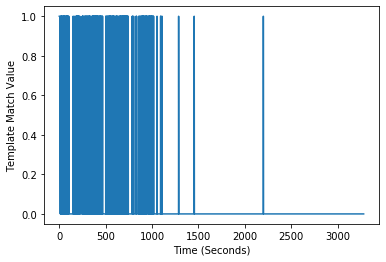

In [16]:
plt.plot(result2)
plt.xlabel('Time (Seconds)')
plt.ylabel('Template Match Value')

Die Ergebnisse gezeigt in kurzer Zeitinterval

Text(0, 0.5, 'Template Match Value')

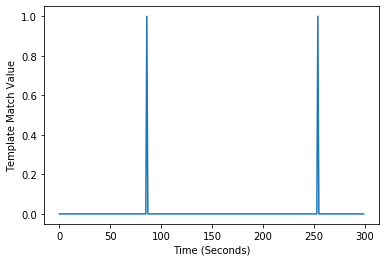

In [17]:
plt.plot(result2[1200:1500])
plt.xlabel('Time (Seconds)')
plt.ylabel('Template Match Value')

Find the positions of the maximas <br> which are above a THRESHOLD

Positionen der Funde in Bezug auf die Zeit mit dem Template Matching

Die Funde mit CNN-Algorithmus von Mario

In [306]:
CNN_finds = np.loadtxt('VP2_20170330_c1_Scolopax_rusticola_TH10.txt', usecols=range(3))
CNN_finds.shape
np.set_printoptions(precision=4,suppress=True)
print(CNN_finds[CNN_finds[:,2]>5.0])

[[2612.  2617.    11.1]
 [2616.  2621.    39.4]
 [2620.  2625.    10.8]
 [2732.  2737.    11.5]
 [2736.  2741.    24.5]
 [3164.  3169.    20.6]
 [3336.  3341.    18.6]
 [3340.  3345.    16.1]
 [3344.  3349.    17.3]
 [4216.  4221.    11.4]
 [4220.  4225.    12.9]
 [6032.  6037.    12.6]]


In [15]:
np.set_printoptions(precision=1,suppress=True)